In [2]:
#importing Essential Package
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#importing data
df = pd.read_csv("crop_production.csv")
df[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# Data Exploration

In [4]:
#checking null value count
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [5]:
#Droping Nan Values
data = df.dropna()
print(data.shape)
#seperating nan values in production field into test dataset
test = df[~df["Production"].notna()].drop("Production",axis=1)
print(test.shape)

(242361, 7)
(3730, 6)


In [6]:
#Exploring unique value in each feature
for i in data.columns:
    print("column name :",i)
    print("No. of column :",len(data[i].unique()))
    print(data[i].unique())

column name : State_Name
No. of column : 33
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
column name : District_Name
No. of column : 646
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG

 'Other Dry Fruit' 'Jute & mesta']
column name : Area
No. of column : 38391
[1.25400e+03 2.00000e+00 1.02000e+02 ... 3.02274e+05 1.14930e+04
 2.79151e+05]
column name : Production
No. of column : 51627
[2.00000e+03 1.00000e+00 3.21000e+02 ... 7.29553e+05 7.30136e+05
 5.97899e+05]


In [7]:
# creating new field which shows the percent of production
sum_maxp = data["Production"].sum()
data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)
data[:5]

C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07


# Data Visulization

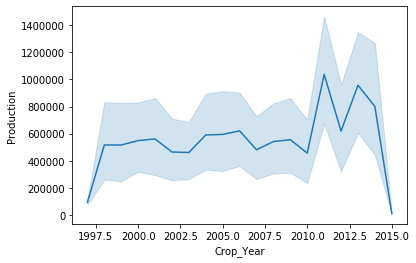

In [8]:
#Crop vs Production
sns.lineplot(data["Crop_Year"],data["Production"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

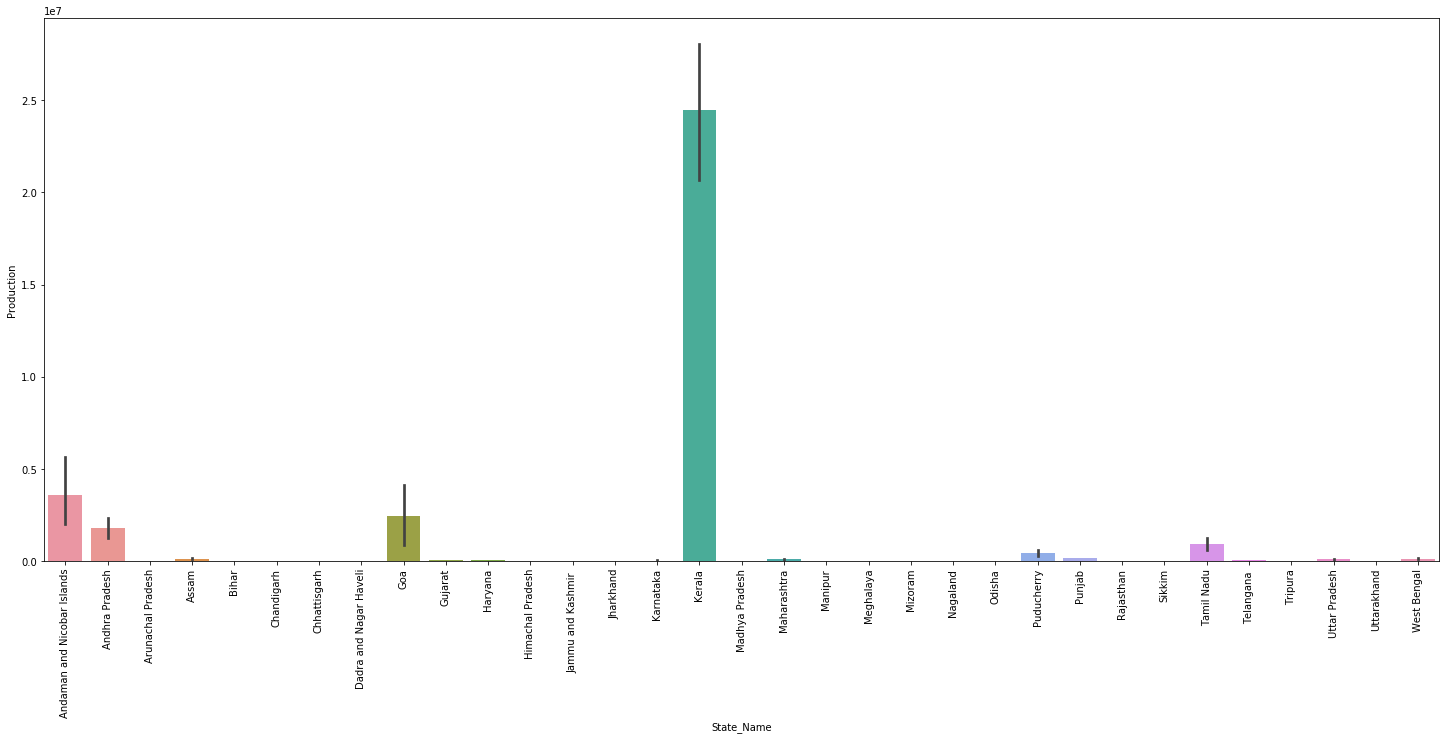

In [9]:
#State vs Production
plt.figure(figsize=(25,10))
sns.barplot(data["State_Name"],data["Production"])
plt.xticks(rotation=90)

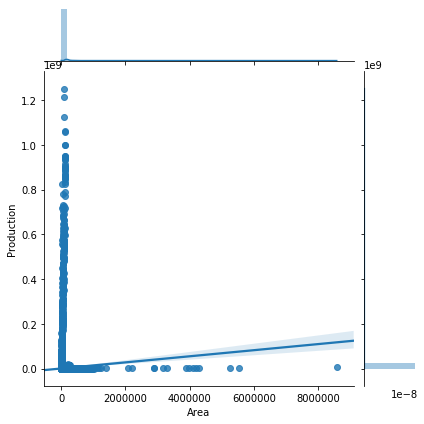

In [10]:
#Area vs Production
sns.jointplot(data["Area"],data["Production"],kind='reg')

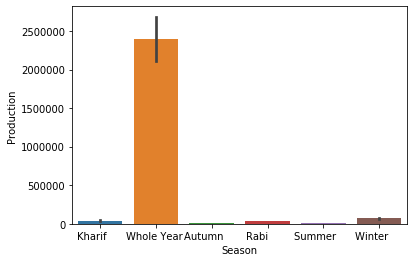

In [11]:
#Season vs Production
sns.barplot(data["Season"],data["Production"])

In [14]:
# Viewing Top crop produced from the data
top_crop_pro = data.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro[:5]

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08


## Each type of crops required various area & various season. so, I'm going to pic top crop from this data

### Problem Statement
1. Does the production of Rice based on season
2. Does the production of various from state
3. Does the production of Rice based on Area

### 1.Rice

In [13]:
rice_df = data[data["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

(15082, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00,2.273756e-07
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.00,2.125005e-07
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84,3.618459e-07


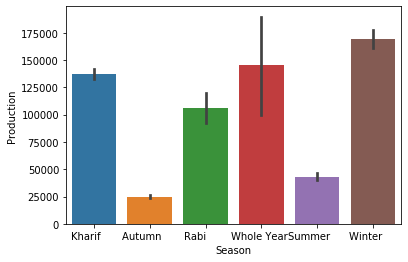

In [14]:
sns.barplot("Season","Production",data=rice_df)

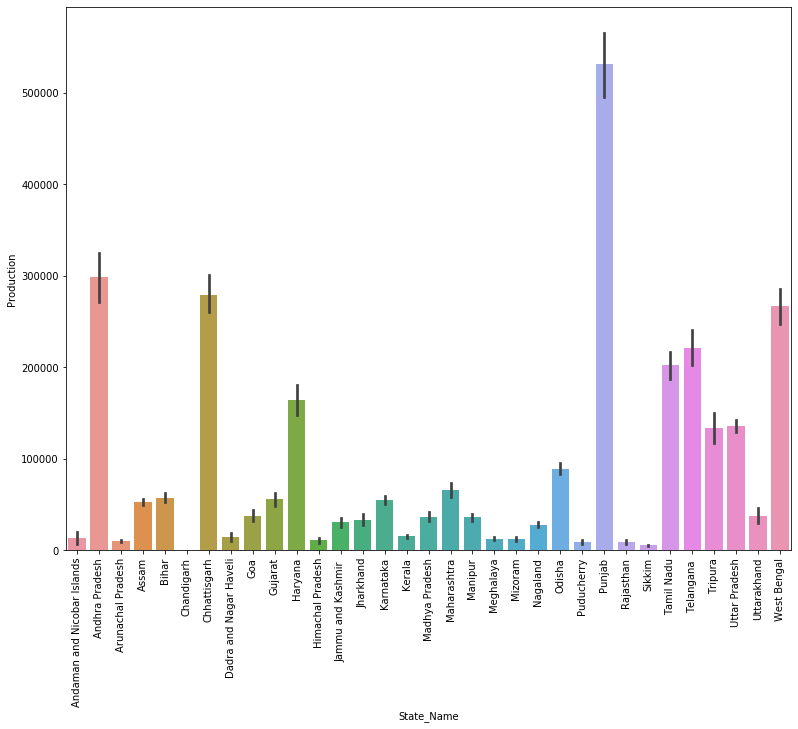

In [15]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

In [16]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:5]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:5]

,District_Name,Production,precent_of_pro
58,BARDHAMAN,34239976.0,2.132707
374,MEDINIPUR WEST,29192719.0,1.818328
612,WEST GODAVARI,27845309.0,1.734402
169,EAST GODAVARI,24690929.0,1.537925
494,SANGRUR,24448000.0,1.522794


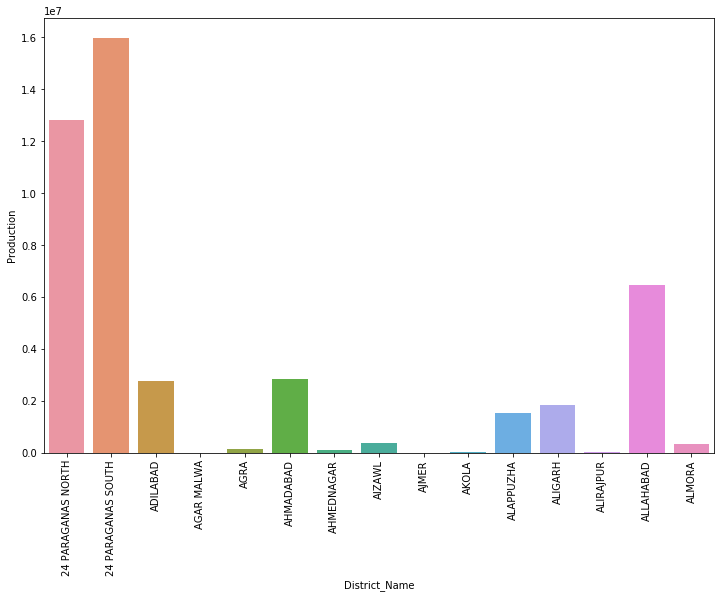

In [26]:
# top 15 rice production based on Production
r_grp = top_rice_pro_dis.groupby("District_Name").sum().reset_index()[:15]
#r_grp
plt.figure(figsize=(12,8))
sns.barplot("District_Name","Production",data=r_grp)
plt.xticks(rotation=90)
plt.show()

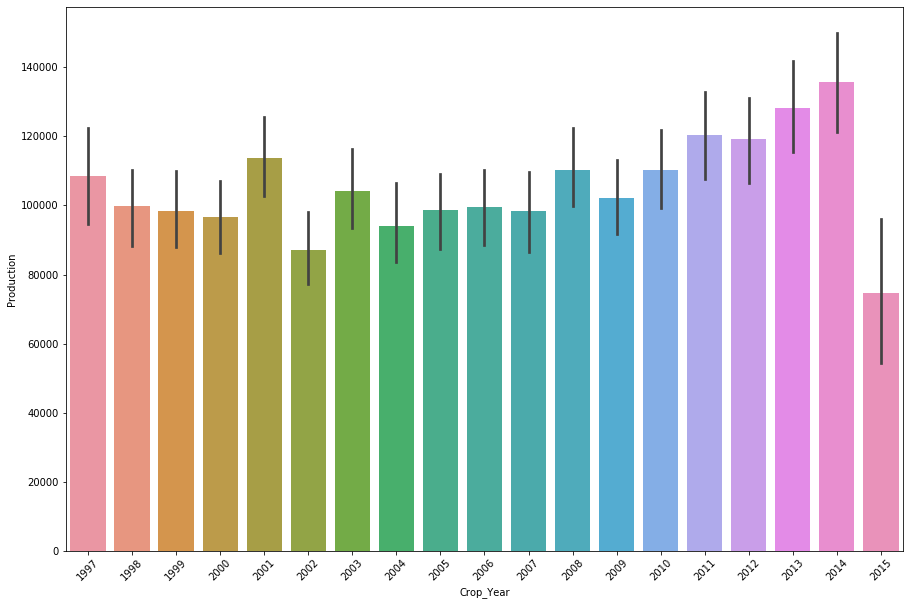

In [20]:
#time vs production
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=rice_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

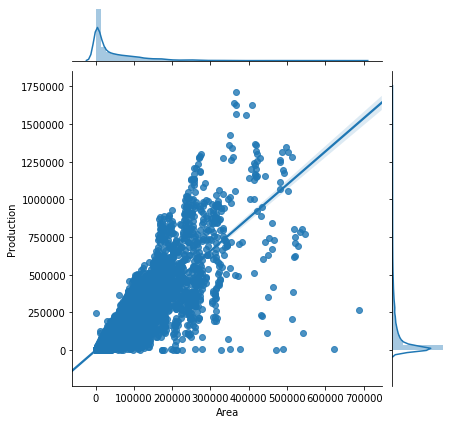

In [21]:
#area vs production
sns.jointplot("Area","Production",data=rice_df,kind="reg")

# Insights:
From Data Visualization:
Rice production is mostly depends on Season, Area, State(place).

# 2. Coconut

### Problem Statement
1. Does the production of coconut based on season?
2. Does the production of coconut various from state?
3. Does the production of coconut based on Area?

In [29]:
#seperating data with cocunut production
coc_df = data[data["Crop"]=="Coconut "]
print(coc_df.shape)
coc_df[:3]

(1958, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,0.046113
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0,0.045638
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.0,67490000.0,0.047806


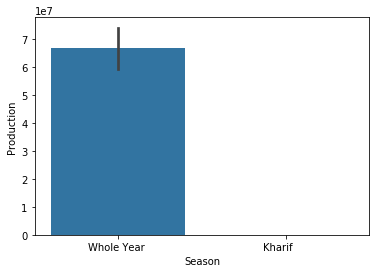

In [30]:
#season vs production
sns.barplot("Season","Production",data=coc_df)

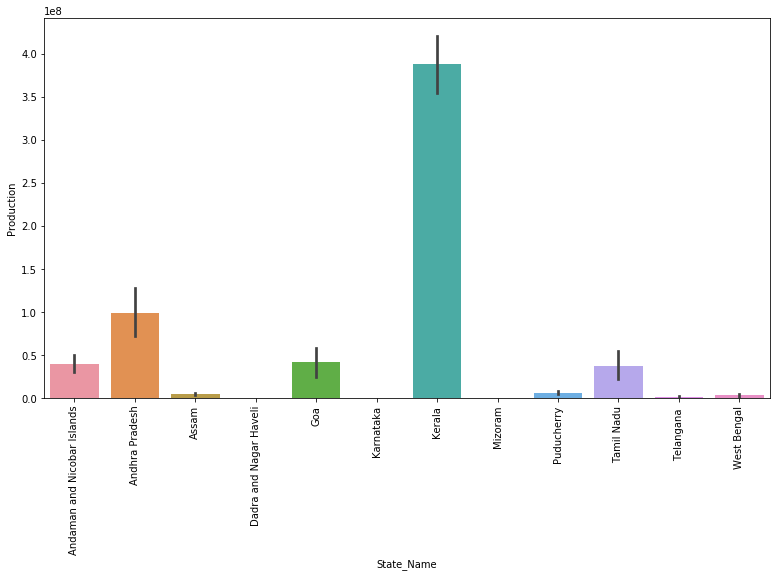

In [31]:
#state vs production
plt.figure(figsize=(13,7))
sns.barplot("State_Name","Production",data=coc_df)
plt.xticks(rotation=90)
plt.show()

In [32]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

,District_Name,Production,precent_of_pro
77,KOZHIKODE,1.527871e+10,11.754512
86,MALAPPURAM,1.451252e+10,11.165052
129,THIRUVANANTHAPURAM,1.001337e+10,7.703678
131,THRISSUR,9.920739e+09,7.632416
64,KANNUR,9.780310e+09,7.524379


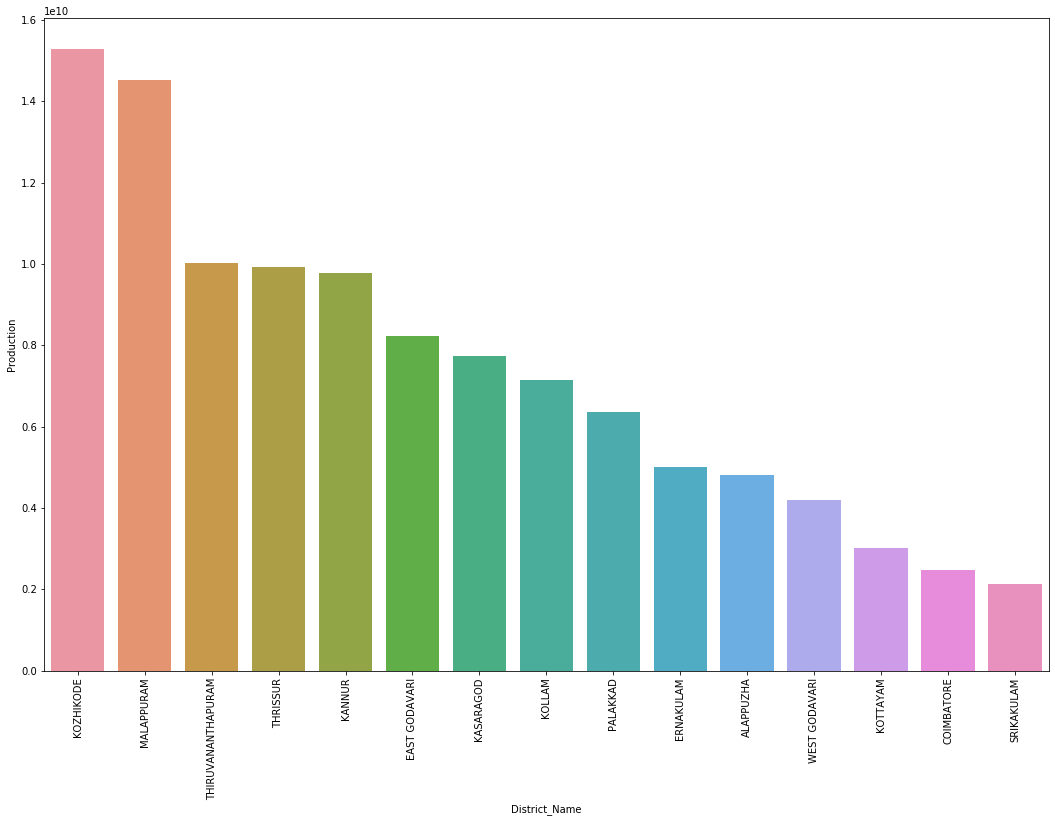

In [35]:
top_coc = top_coc_pro_dis.sort_values("Production",ascending=False)[:15]
plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_coc)
plt.xticks(rotation=90)
plt.show()

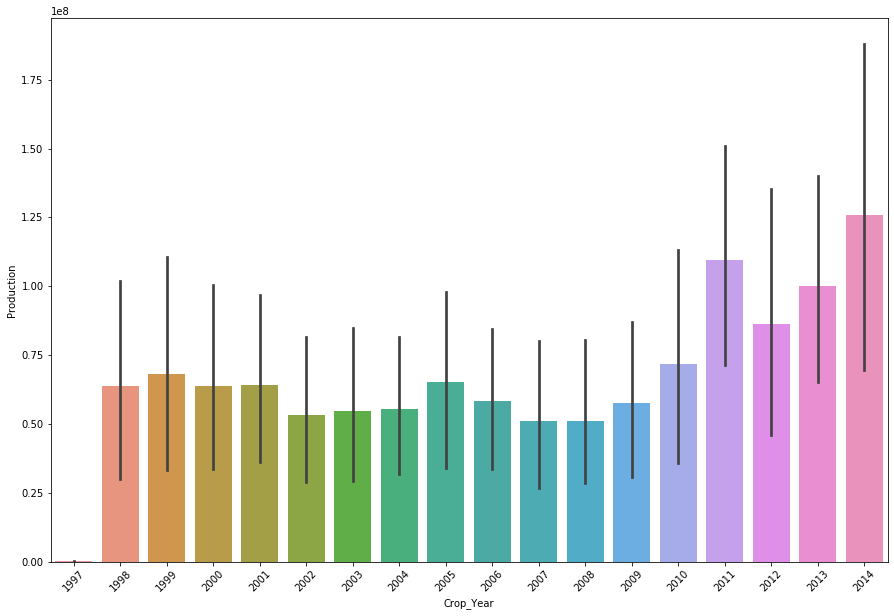

In [27]:
#time vs production
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=coc_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

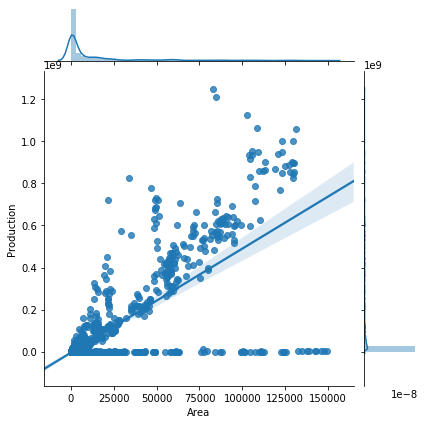

In [28]:
#area vs production
sns.jointplot("Area","Production",data=coc_df,kind="reg")

# Insight from Cocunut Production

* cocunut production is directly proportional to area
* its production is also gradually increasing over a time of period
* production is highin kerala state
* it does not depends on season

# 3. Sugarcane

### Problem Statement
1. Does the production of sugarcane based on season?
2. Does the production of sugarcane various from state?
3. Does the production of sugarcane based on Area?

In [39]:
#seprating data which is sugarcane
sug_df = data[data["Crop"]=="Sugarcane"]
print(sug_df.shape)
sug_df[:3]

(7827, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,1.416670e-09
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.0,7.083351e-10
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.0,2.833340e-08


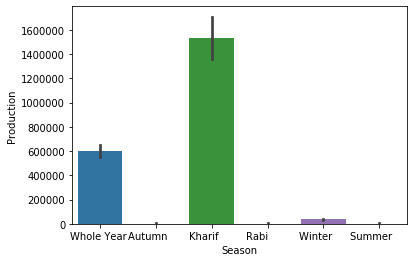

In [40]:
#season vs production
sns.barplot("Season","Production",data=sug_df)

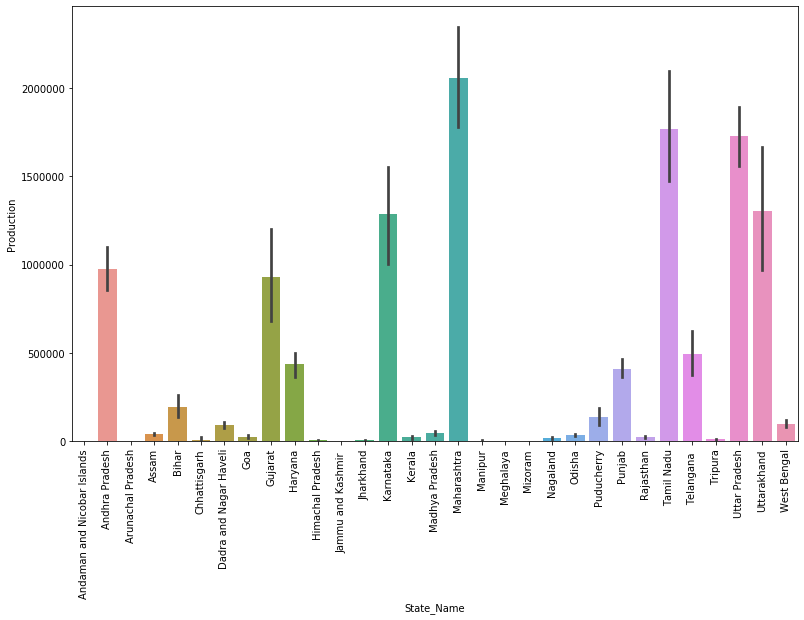

In [41]:
#state vs production
plt.figure(figsize=(13,8))
sns.barplot("State_Name","Production",data=sug_df)
plt.xticks(rotation=90)
plt.show()

In [42]:
top_sug_pro_dis = sug_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_sug_pro_dis[:5]
sum_max = top_sug_pro_dis["Production"].sum()
top_sug_pro_dis["precent_of_pro"] = top_sug_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_sug_pro_dis[:5]

,District_Name,Production,precent_of_pro
360,MUZAFFARNAGAR,258698795.0,4.673296
81,BIJNOR,230907185.0,4.171251
283,KHERI,224383685.0,4.053407
63,BELGAUM,198207649.0,3.580546
294,KOLHAPUR,157210426.0,2.839947


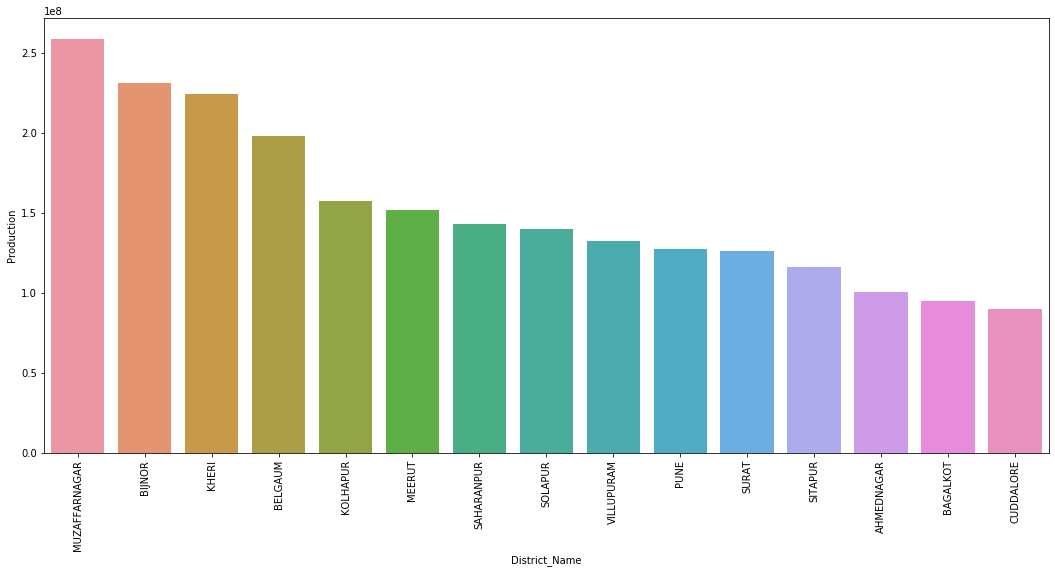

In [43]:
top_sug = top_sug_pro_dis.sort_values("Production",ascending=False)[:15]
plt.figure(figsize=(18,8))
sns.barplot("District_Name","Production",data=top_sug)
plt.xticks(rotation=90)
plt.show()

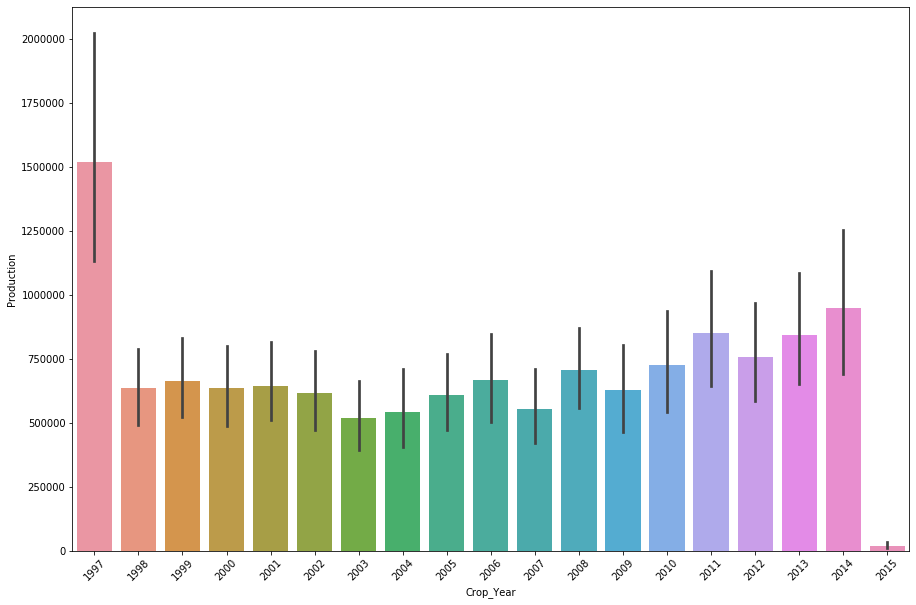

In [44]:
#time vs production
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=sug_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

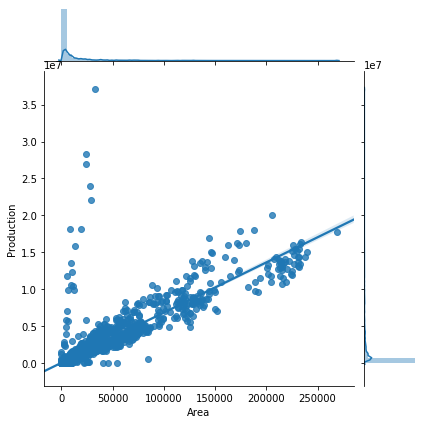

In [35]:
#area vs production
sns.jointplot("Area","Production",data=sug_df,kind="reg")

# Insighits:
* Sugarecane production is directly proportional to area
* And the production is high in some state only.

# Feature Selection

In [45]:
data1 = data.drop(["District_Name","Crop_Year"],axis=1)

In [47]:
data_dum = pd.get_dummies(data1)
data_dum[:5]

,Area,Production,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1.416670e-06,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,7.083351e-10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,2.273756e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,4.540428e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,1.168753e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Test Train Split

In [63]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.44, random_state=100)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)


x_train : (135722, 165)
x_test : (106639, 165)
y_train : (135722, 1)
y_test : (106639, 1)


In [64]:
x_train[:5]

,Area,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
157580,41.0,3.159175e-08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81123,8768.0,2.504673e-06,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243989,1180.0,1.277489e-02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87988,366.0,1.855838e-07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91029,11.0,6.375016e-09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model -1: Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
preds = model.predict(x_test)

C:\Users\Anand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
from sklearn.metrics import r2_score
r = r2_score(y_test,preds)
print("R2score when we predict using Randomn forest is ",r)

R2score when we predict using Randomn forest is  0.999580927873214


In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
m = mean_absolute_error(y_test,preds)
m1 = mean_squared_error(y_test,preds)
print("MAE when we predict using Randomn forest is ",m)

MAE when we predict using Randomn forest is  6932.680612914156


# Model -2 : Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
preds = model.predict(x_test)

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_squared_error(y_test,preds)
m = mean_absolute_error(y_test,preds)
m1 = mean_squared_error(y_test,preds)
print("MAE when we predict using Linear Reg is ",m)
r = r2_score(y_test,preds)
print("R2score when we predict using Linear Reg is ",r)

MAE when we predict using Linear Reg is  5.716481053276626e-05
R2score when we predict using Linear Reg is  1.0


# Prediction
Model 1: Linear Regression has high r2score & low mean absolute error when compare to other model

In [68]:
#predicting with linear regression
tst = test.drop(["District_Name","Crop_Year"],axis=1)
tst_dum = pd.get_dummies(tst)
tst_dum[:5]

,Area,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Goa,State_Name_Gujarat,...,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Crop_other oilseeds
46,795.67,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,17.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
623,1000.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630,1000.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,8.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
y_test = tst_dum.copy()
print(x_train.shape)
print(y_test.shape)

(135722, 165)
(3730, 92)


In [70]:
def common_member(x_train,x_test): 
    a_set =  set(x_train.columns.tolist())
    b_set =  set(x_test.columns.tolist())
    if (a_set & b_set): 
        return list(a_set & b_set) 

In [71]:
com_fea = common_member(x_train,tst_dum)
len(com_fea)

92

In [72]:
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
model.fit(x_train[com_fea],y_train)
preds = model.predict(y_test[com_fea])

In [73]:
preds

array([[-3199128.03915679],
       [ -211072.08205789],
       [  972477.42071203],
       ...,
       [-1181863.74455615],
       [-1180428.11948691],
       [-1105750.50306495]])

In [82]:
test["production"] = predicts

In [88]:
#replacing value below 0 into 0
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3730 entries, 46 to 245865
Data columns (total 7 columns):
State_Name       3730 non-null object
District_Name    3730 non-null object
Crop_Year        3730 non-null int64
Season           3730 non-null object
Crop             3730 non-null object
Area             3730 non-null float64
production       3730 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 233.1+ KB


In [92]:
test["production"][test["production"]<0]=0

C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
test[:10]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,0.000000e+00
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,0.000000e+00
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,9.724774e+05
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,1.196944e+06
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,8.911996e+05
723,Andhra Pradesh,ANANTAPUR,2010,Kharif,Other Kharif pulses,1.00,9.217505e+05
1153,Andhra Pradesh,CHITTOOR,2001,Rabi,Wheat,4.00,2.578977e+05
1317,Andhra Pradesh,CHITTOOR,2004,Rabi,Wheat,2.00,2.578675e+05
1419,Andhra Pradesh,CHITTOOR,2007,Kharif,Moong(Green Gram),1000.00,9.724774e+05
1423,Andhra Pradesh,CHITTOOR,2007,Kharif,Small millets,1000.00,9.022295e+05


In [76]:
test.to_csv('Prediction.csv')